In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# ============================== loading libraries ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import cross_val_score # It must relate to the renaming 
                                                     # and deprecation of cross_validation sub-module to model_selection
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
#from sklearn import cross_validation
from sklearn.model_selection import cross_validate
# =============================================================================================

In [11]:
# Part I
# ============================== data preprocessing ===========================================

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('/content/drive/MyDrive/AAIC/KNN/demo_data/3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df


          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


In [12]:
#print(X)


### Simple Cross Validation 

In [13]:
# split the data set into train and test
#X_1, X_test, y_1, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0) # depricated
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# split the train data set into cross validation train and cross validation test
#X_tr, X_cv, y_tr, y_cv = cross_validation.train_test_split(X_1, y_1, test_size=0.3)               # depricated
X_train, X_cv, y_train, y_cv =  train_test_split(X_1, y_1, test_size=0.3)


for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_train, y_train)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 85%

CV accuracy for k = 3 is 88%

CV accuracy for k = 5 is 88%

CV accuracy for k = 7 is 85%

CV accuracy for k = 9 is 83%

CV accuracy for k = 11 is 81%

CV accuracy for k = 13 is 79%

CV accuracy for k = 15 is 80%

CV accuracy for k = 17 is 80%

CV accuracy for k = 19 is 79%

CV accuracy for k = 21 is 80%

CV accuracy for k = 23 is 77%

CV accuracy for k = 25 is 76%

CV accuracy for k = 27 is 74%

CV accuracy for k = 29 is 72%

****Test accuracy for k = 1 is 89%


### 10 fold cross validation 


The optimal number of neighbors is 1.


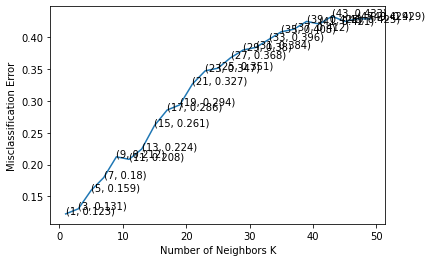

the misclassification error for each k value is :  [0.123 0.131 0.159 0.18  0.212 0.208 0.224 0.261 0.286 0.294 0.327 0.347
 0.351 0.368 0.38  0.384 0.396 0.408 0.412 0.425 0.421 0.433 0.425 0.429
 0.429]


In [14]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))

In [15]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 1 is 89.333333%


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsClassifier
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
# creating odd list of K for KNN
myList = list(range(0,10))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X, y, cv=2, scoring='accuracy')
    print(X)
    cv_scores.append(scores.mean())


1
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [-0.05637009 -0.04464164  0.09295276 ...  0.02545259  0.02605609
   0.04034337]
 [-0.06000263  0.05068012  0.01535029 ... -0.00259226 -0.03075121
  -0.0010777 ]
 [-0.04910502  0.05068012 -0.00512814 ...  0.07120998  0.06123791
  -0.03835666]]
3
[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [-0.05637009 -0.04464164  0.09295276 ...  0.02545259  0.02605609
   0.04034337]
 [-0.06000263  0.05068012  0.01535029 ... -0.00259226 -0.03075121
  -0.0010777 ]
 [-0.04910502  0.05068012 -0.00512814 ...  0.07120998  0.06123791
  -0.03835666]]
5
[[ 0.03807

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,
